

# Loan data from Lending Club

**Description**

This data set represents thousands of loans made through the Lending Club platform, which is a platform that allows individuals to lend to other individuals. Of course, not all loans are created equal. Someone who is a essentially a sure bet to pay back a loan will have an easier time getting a loan with a low interest rate than someone who appears to be riskier. And for people who are very risky? They may not even get a loan offer, or they may not have accepted the loan offer due to a high interest rate. It is important to keep that last part in mind, since this data set only represents loans actually made, i.e. do not mistake this data for loan applications!
  
**Target**

1. 	Describe the dataset and any issues with it. 
2.	Generate a minimum of 5 unique visualizations using the data and write a brief description of your observations. Additionally, all attempts should be made to make the visualizations visually appealing.


# Import Libraries

In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from dython.nominal import associations

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import silhouette_score

import scipy.stats as stats
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from termcolor import colored
print('OK')

OK


 # Loading Data

In [279]:
#Read and write to excel
dataLoan =  pd.read_csv(r'E:\MindX\Khóa 4 - DA Summary\Buổi 7\Lending Club platform\loans_full_schema.csv')
dataLoan.head(10)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
5,NaN,NaN,KY,OWN,34000.0,Not Verified,6.46,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0
6,hr,10.0,MI,MORTGAGE,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,...,C2,Jan-2018,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0
7,police,10.0,AZ,MORTGAGE,110000.0,Source Verified,16.19,NaN,NaN,NaN,...,B5,Jan-2018,Current,whole,Cash,19005.39,1765.84,994.61,771.23,0.0
8,parts,10.0,NV,MORTGAGE,65000.0,Source Verified,36.48,NaN,NaN,NaN,...,C2,Feb-2018,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0.0
9,4th person,3.0,IL,RENT,30000.0,Not Verified,18.91,NaN,NaN,NaN,...,A3,Mar-2018,Current,fractional,Cash,6077.13,391.15,322.87,68.28,0.0


# Target

## Describe the dataset and any issues with it. 

In [280]:
#check rows and columns
dataLoan.shape

(10000, 55)

In [281]:
#Check the first 5 lines
dataLoan.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [282]:
#Check the last 5 lines
dataLoan.tail()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0
9999,operations analyst,3.0,CT,RENT,66000.0,Not Verified,20.82,NaN,NaN,NaN,...,B4,Feb-2018,Current,whole,Cash,11574.83,1658.56,1225.17,433.39,0.0


In [283]:
#Check the data formatting of columns
dataLoan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [284]:
# View the data format of the columns
dataLoan.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [285]:
#Convert null values to not specified in column emp_title
dataLoan['emp_title'] = dataLoan['emp_title'].fillna("not specified")

#Convert null values to not specified in column verification_income_joint
dataLoan['verification_income_joint'] = dataLoan['verification_income_joint'].fillna("not specified")



In [286]:

# Convert NA values to mean values in columns emp_length, debt_to_income, annual_income_joint, months_since_90d_late
#                                                                    , debt_to_income_joint, months_since_last_delinq
#                                                                  , months_since_last_credit_inquiry, num_accounts_120d_past_due
dataLoan = dataLoan.fillna(dataLoan.mean())


C:\Users\Admin\AppData\Local\Temp/ipykernel_32048/2123848316.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataLoan = dataLoan.fillna(dataLoan.mean())


In [287]:
# Check if the conversion is successful
dataLoan.isnull().sum()

emp_title                           0
emp_length                          0
state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
annual_income_joint                 0
verification_income_joint           0
debt_to_income_joint                0
delinq_2y                           0
months_since_last_delinq            0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
months_since_90d_late               0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfac

**Comments**:

* The data has 10000 rows with 55 attributes but not many null data.

* Columns with many NA values such as annual_income_joint, verification_income_joint, debt_to_income_joint, months_since_last_delinq, months_since_90d_late will be returned to mean for analysis.

## Exploratory Data Analysis 

In [288]:
#GroupBy with condition of  two labels and ranges:
# result = dataLoan.groupby(pd.cut(dataLoan['emp_length'], 
#                   bins=[0,1,3,7,10],  
#                   labels=['Fresher', 'Junior', 'Senior', 'Manager']))['annual_income', 'interest_rate'].mean().reset_index()
# result

### Which state has the highest number of borrowers?

In [289]:
summary_by_state = dataLoan.groupby(["state"], as_index=False)\
    ["loan_amount"]\
    .agg([np.size, np.sum]).reset_index().rename(columns={'size':'no_borrowers','sum':'total_loan_amount'})

In [290]:
summary_by_state.sort_values('no_borrowers', ascending=False, inplace=True, ignore_index=True)


In [291]:
summary_by_state['Percentage'] = summary_by_state['no_borrowers']/summary_by_state['no_borrowers'].sum()*100


In [292]:
summary_by_state['Cummulate']  = summary_by_state['Percentage'].cumsum()


In [293]:
summary_by_state.head(10)

,state,no_borrowers,total_loan_amount,Percentage,Cummulate
0,CA,1330,22073700,13.30,13.30
1,TX,806,13755275,8.06,21.36
2,NY,793,12589650,7.93,29.29
3,FL,732,11203675,7.32,36.61
4,IL,382,6776600,3.82,40.43
5,OH,338,5434125,3.38,43.81
6,NJ,338,5665850,3.38,47.19
7,GA,334,5545300,3.34,50.53
8,NC,299,4809225,2.99,53.52
9,PA,298,4665825,2.98,56.50


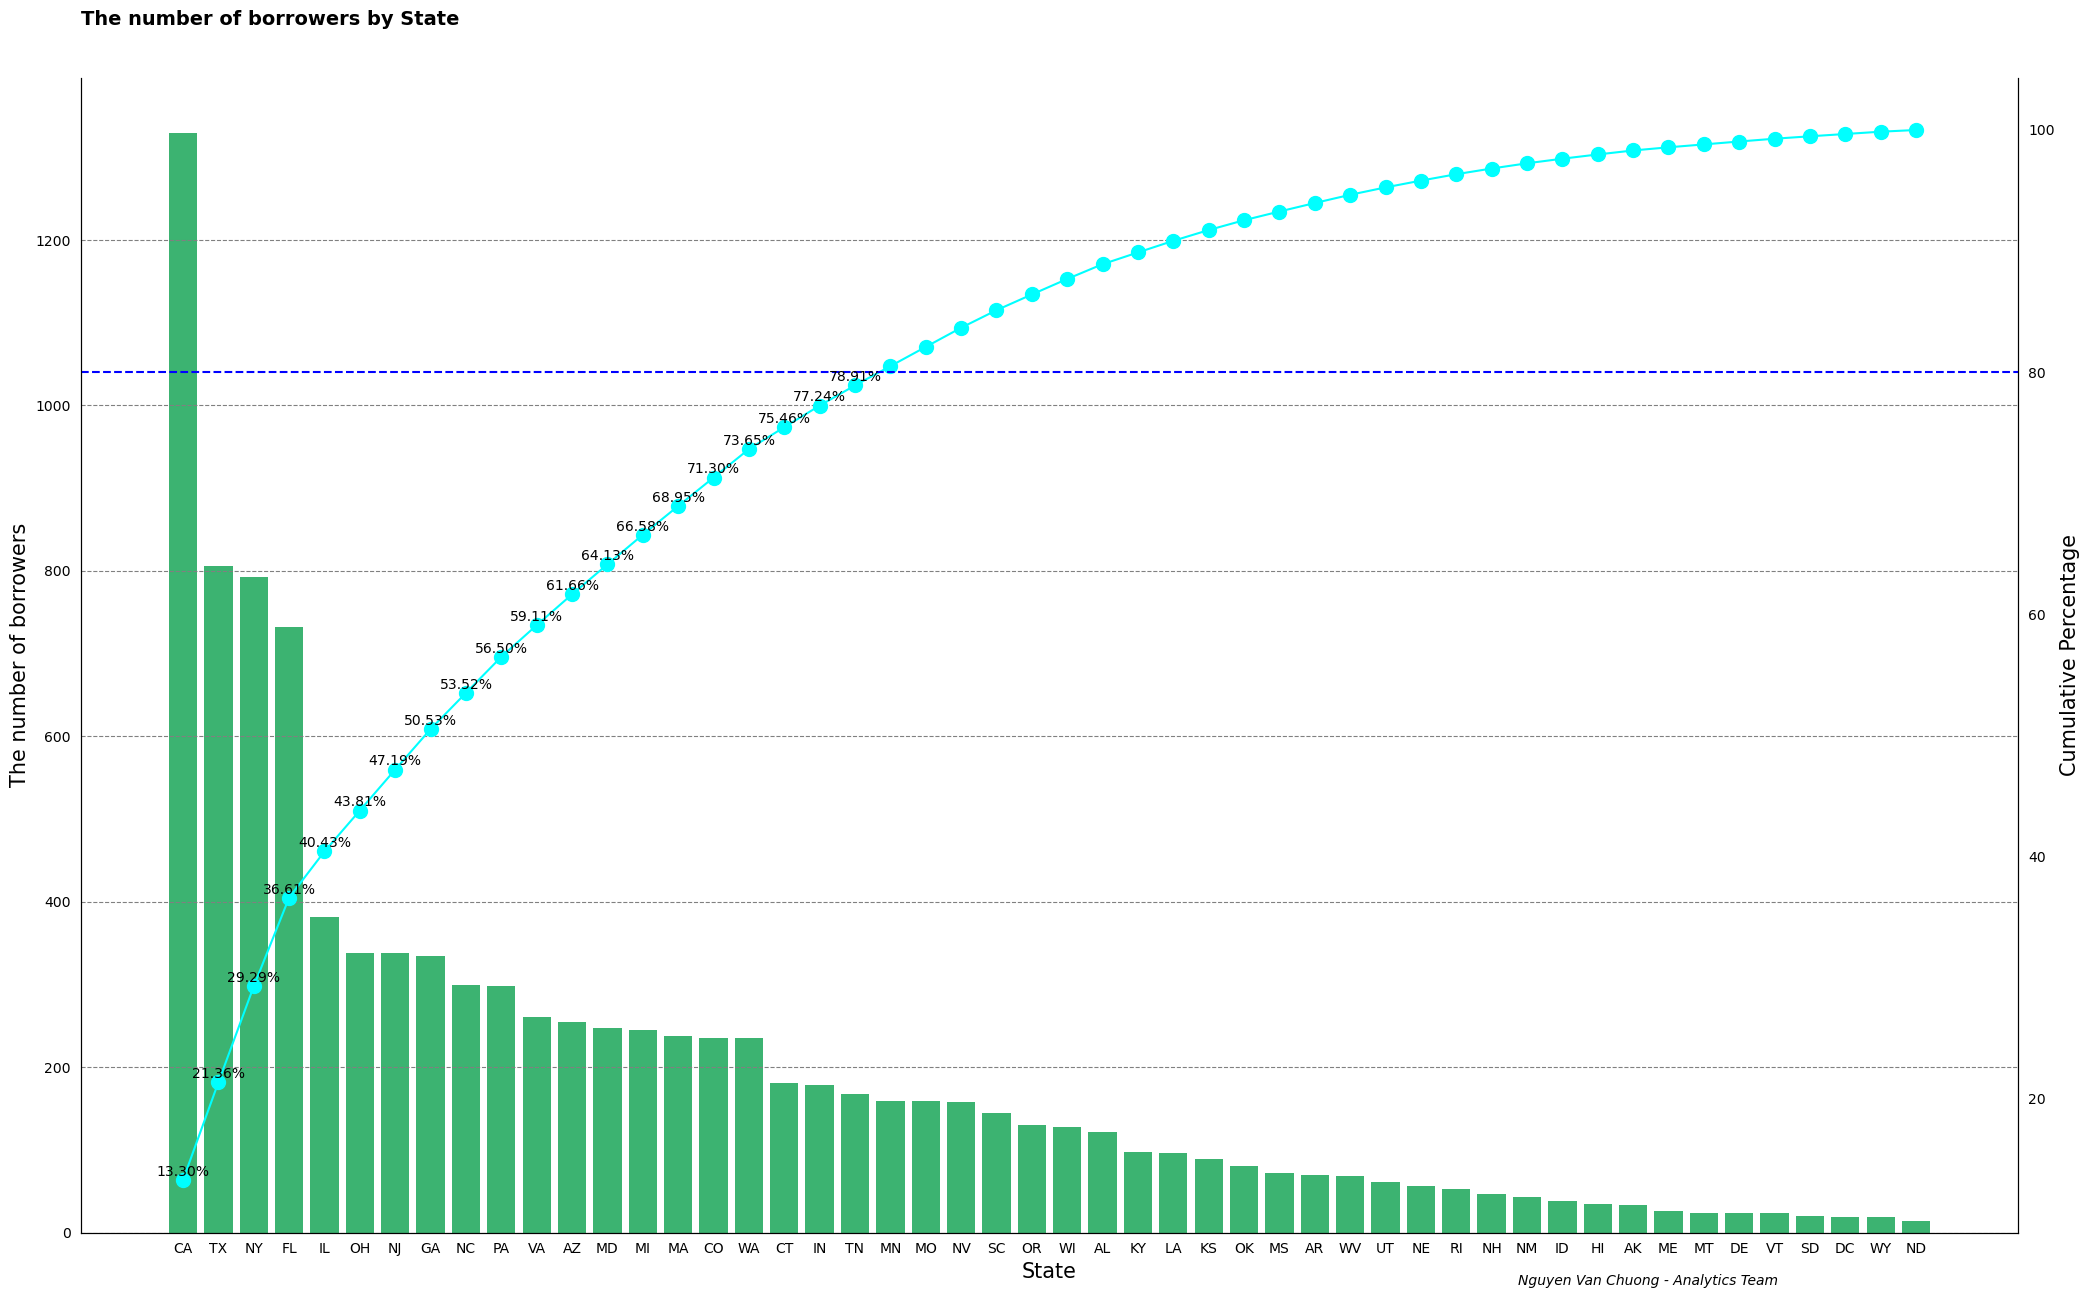

In [294]:
# Set figure and axis
fig, ax1 = plt.subplots(figsize=(25,15))
xs = summary_by_state['state']
ys = summary_by_state['no_borrowers']
yl = summary_by_state['Cummulate']

# Plot bars
ax1.bar(xs, ys, color = '#3cb371')
"""
for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        ax1.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center
"""
#ax1.set_title("The number of borrowers by State", fontsize = 25, color = 'blue')
ax1.set_xlabel("State", fontsize = 15)
ax1.set_ylabel("The number of borrowers", fontsize = 15)

# Second y axis (i.e. cumulative percentage)
ax2 = ax1.twinx()
ax2.plot(xs,yl, color="#00ffff", marker="o", ms=10)

ax2.axhline(80, color="blue", linestyle="--") # Tạo đường 80%

#annotate for line
for x,y in zip(xs,yl):
    if y > 80:
        break
    else:
        label = "{:.2f}".format(y) + '%'

        ax2.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,3), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center
        
ax1.yaxis.grid(color='gray', linestyle='dashed')
ax1.tick_params(left=False, bottom=False)
ax2.tick_params(right=False, bottom=False) 

ax2.set_ylabel("Cumulative Percentage", fontsize = 15)

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False) 

plt.suptitle('The number of borrowers by State', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 0.925)
plt.text(0.7, 0.075, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)
plt.show()

**Comment:**
CA is the state with the largest number of borrowers up to 13.3%. The states TX, NY, FL, IL also have a higher number of borrowers than the rest. At the same time, the 5 states with the highest number of borrowers accounted for 40.43% of the total number of borrowers.

### The top 10 states with the largest amount loan?

In [295]:
summary_by_state['proportion'] = summary_by_state['total_loan_amount']/summary_by_state['total_loan_amount'].sum()*100

In [296]:
top10_state = summary_by_state.loc[:, ['state','total_loan_amount','proportion']].head(10).copy()

In [297]:
top10_state['total_loan_amount'] = top10_state['total_loan_amount']/1000


In [298]:
top10_state.sort_values('total_loan_amount', ascending=True, inplace=True, ignore_index=True)


In [299]:
top10_state

,state,total_loan_amount,proportion
0,PA,4665.825,2.851636
1,NC,4809.225,2.939279
2,OH,5434.125,3.321202
3,GA,5545.300,3.389149
4,NJ,5665.850,3.462827
5,IL,6776.600,4.141689
6,FL,11203.675,6.847407
7,NY,12589.650,7.694481
8,TX,13755.275,8.406882
9,CA,22073.700,13.490896


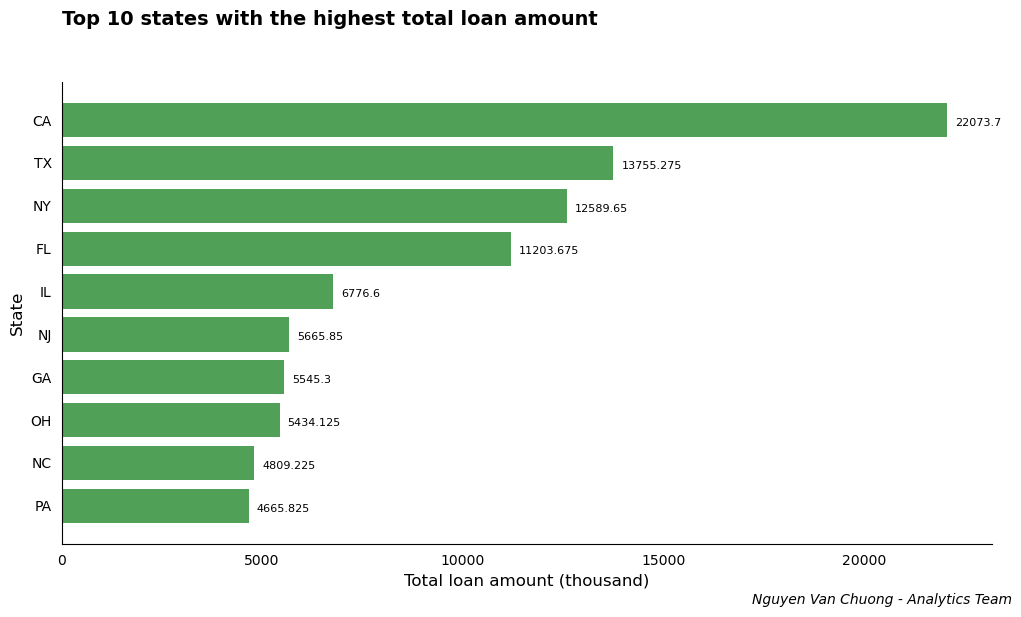

In [300]:
# plot
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh(top10_state['state'],top10_state['total_loan_amount'],data=top10_state,color='#50a057')

# Show data
i = 0
for p in bar1.patches:
    t1 = ax.annotate(top10_state.total_loan_amount[i], xy=(p.get_width()+200, p.get_y()+p.get_height()/3))
    t1.set(size=8)
    i+=1
    
# remove the line above and to the right of the chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# remove ticks on 2 axes
ax.tick_params(left=False, bottom=False) 

# add title, label axes and source:
plt.suptitle('Top 10 states with the highest total loan amount', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
#plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('Total loan amount (thousand)', size=12)
plt.ylabel('State', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

### What are the purposes of the loan?

In [301]:
summary_by_loan_purpose = dataLoan.groupby(["loan_purpose"], as_index=False)\
    ["loan_amount"]\
    .agg([np.size, np.sum]).reset_index().rename(columns={'size':'no_borrowers','sum':'total_loan_amount'})

In [302]:
summary_by_loan_purpose.sort_values('no_borrowers', ascending=True, inplace=True, ignore_index=True)
summary_by_loan_purpose

,loan_purpose,no_borrowers,total_loan_amount
0,renewable_energy,10,140000
1,vacation,62,421900
2,moving,69,682675
3,small_business,125,2477500
4,car,131,1361250
5,house,151,2689275
6,medical,162,1836800
7,major_purchase,303,4752425
8,home_improvement,680,11719225
9,other,914,11819025


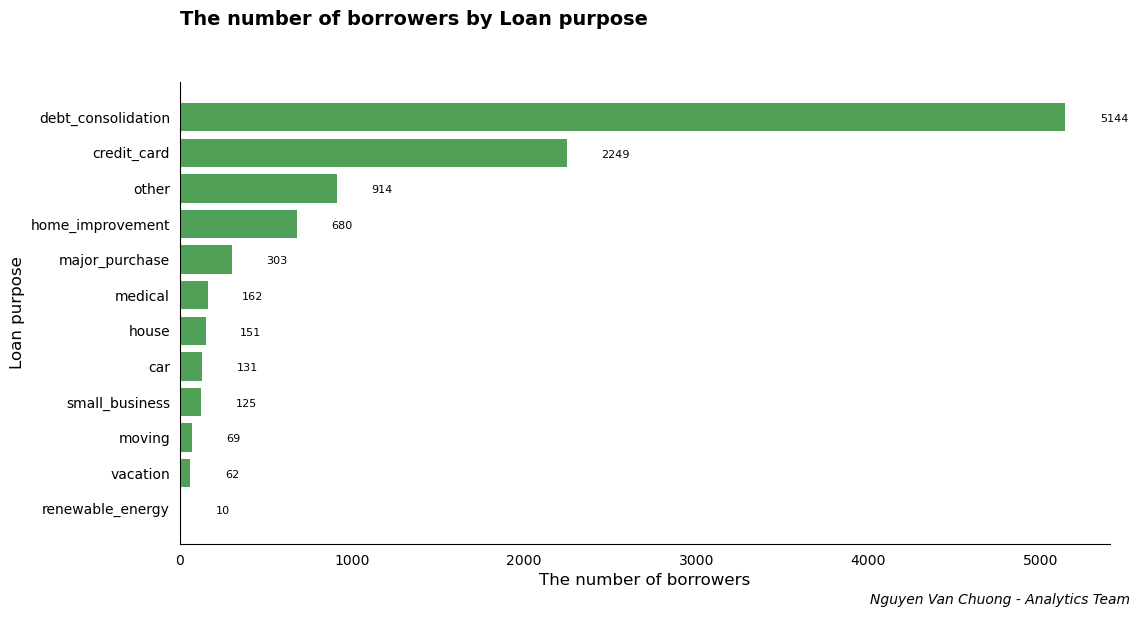

In [303]:
# plot
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh(summary_by_loan_purpose['loan_purpose'],summary_by_loan_purpose['no_borrowers'],data=summary_by_loan_purpose,color='#50a057')

# Show dữ liệu
i = 0
for p in bar1.patches:
    t1 = ax.annotate(summary_by_loan_purpose.no_borrowers[i], xy=(p.get_width()+200, p.get_y()+p.get_height()/3))
    t1.set(size=8)
    i+=1
    
# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False) 

# thêm title, label các trục và source:
plt.suptitle('The number of borrowers by Loan purpose', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
#plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('The number of borrowers', size=12)
plt.ylabel('Loan purpose', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()


**Comment**: Loans are largely for debt consolidation.

### What is the customer's annual income?

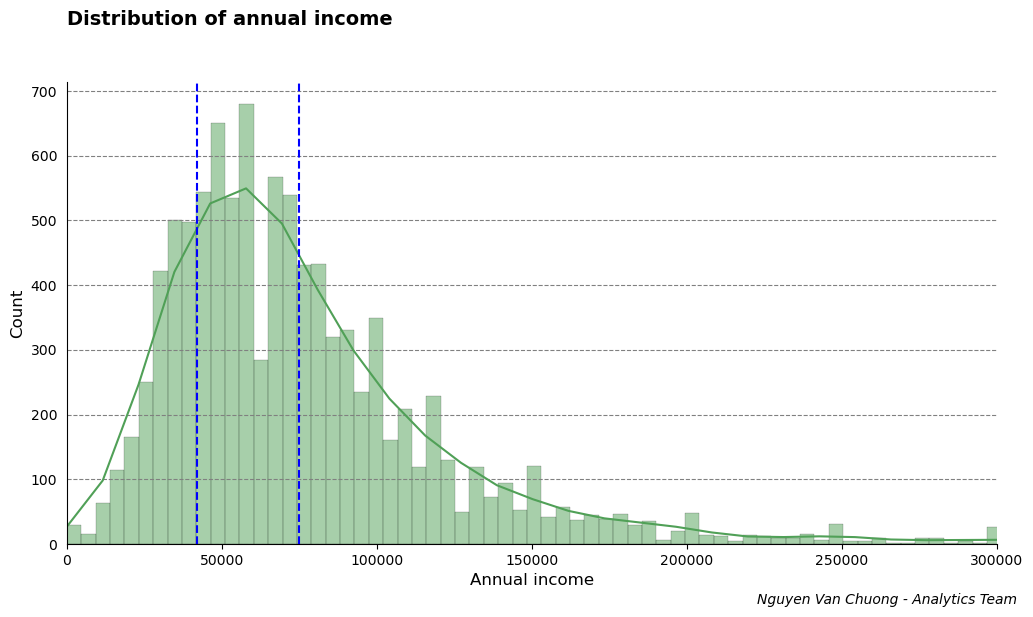

In [304]:
fig, ax = plt.subplots(figsize=(12, 6))

ax=sns.histplot(data=dataLoan, x=dataLoan.annual_income, kde=True, color='#50a057')
ax.axvline(42000, color="blue", linestyle="--")
ax.axvline(75000, color="blue", linestyle="--")
plt.xlim(0, 300000)

ax.yaxis.grid(color='gray', linestyle='dashed')
# remove the line above and to the right of chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# remove ticks on 2 axes
ax.tick_params(left=False) 

# Add title, label axes and source:
plt.suptitle('Distribution of annual income', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
#plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('Annual income', size=12)
plt.ylabel('Count', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

**Comment**: Annual income of customers is mostly concentrated from 47,000USD to 75,000USD

### What is the loan and debt on the income of customers?

In [305]:
data = dataLoan.loc[:, ['loan_status','debt_to_income']].copy()

In [306]:
mean_list = data.groupby('loan_status', as_index=False)['debt_to_income'].mean().rename(columns={'debt_to_income':'mean'})

In [307]:
mean_list.sort_values('mean', ascending=True, inplace=True, ignore_index=True)

In [308]:
mean_list

,loan_status,mean
0,Late (31-120 days),16.039394
1,Fully Paid,17.490417
2,Late (16-30 days),17.952368
3,Charged Off,18.457143
4,Current,19.419449
5,In Grace Period,19.945943


In [310]:
data1 = pd.merge(data,mean_list,on='loan_status',how='left')

In [311]:
data1.sort_values('mean', ascending=True, inplace=True, ignore_index=True)


In [312]:
data1

,loan_status,debt_to_income,mean
0,Late (31-120 days),24.66,16.039394
1,Late (31-120 days),27.68,16.039394
2,Late (31-120 days),0.45,16.039394
3,Late (31-120 days),4.35,16.039394
4,Late (31-120 days),31.08,16.039394
...,...,...,...
9995,In Grace Period,15.86,19.945943
9996,In Grace Period,17.80,19.945943
9997,In Grace Period,28.27,19.945943
9998,In Grace Period,1.48,19.945943


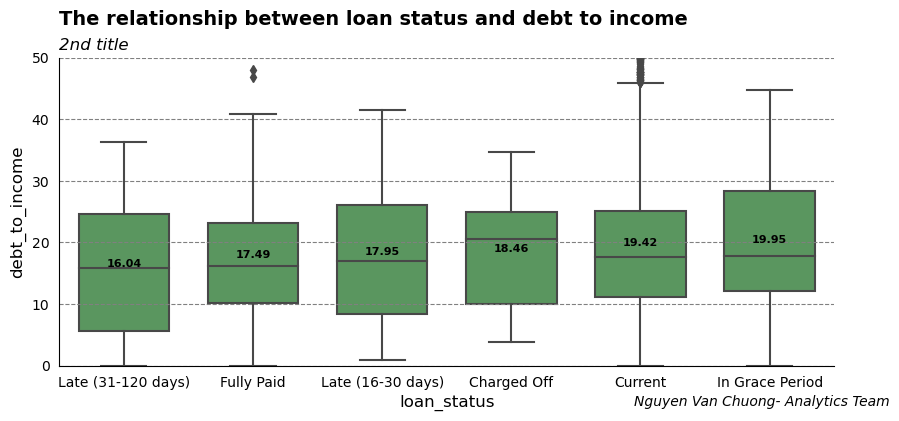

In [314]:
fig, ax = plt.subplots(figsize=(10, 4))
box_width=0.7

ax=sns.boxplot(x=data1.loan_status, y=data1.debt_to_income, data=data1, width=box_width, color='#50a057')

# show medians
i = 0
for i in range(mean_list.shape[0]):
    x = i #+box_width/2*1.05
    y = mean_list.loc[i,['mean']]
    ax.annotate('%.2f' %mean_list.loc[i,['mean']],
                  (x,y),
                  #color='white',
                  weight='semibold',
                ha='center',
                  size=8
                 )

# Add x, y gridlines
ax.yaxis.grid(color='gray', linestyle='dashed')

# Remove the line above and to the right of the chart\n
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# Remove ticks in 2 axes
ax.tick_params(left=False, bottom=False) 

# Add title, label axes and source:
plt.suptitle('The relationship between loan status and debt to income', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('loan_status', size=12)
plt.ylabel('debt_to_income', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong- Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.ylim(0, 50)
plt.show()

**Comments**
* Loans with a delay of 31-120 days belong to the group of borrowers with the lowest debt-to-total income ratio, lower than loans with Full Paid status.
* Loans in the In Grace Period status (within the grace period) have a clearly higher debt-to-total income ratio than the rest of the groups.

### What are the level of loans and interest rates for customers?

In [315]:
dataLoan_grade = dataLoan.loc[:, ['grade','interest_rate']].copy()

In [316]:
dataLoan_grade.sort_values('grade', ascending=True, inplace=True, ignore_index=True)

In [317]:
dataLoan_grade

,grade,interest_rate
0,A,6.72
1,A,7.34
2,A,6.07
3,A,7.34
4,A,7.34
...,...,...
9995,G,30.79
9996,G,30.79
9997,G,30.79
9998,G,30.79


In [318]:
mean_list_grade = dataLoan_grade.groupby('grade')['interest_rate'].median()

In [319]:
mean_list_grade

grade
A     6.72
B    10.42
C    14.07
D    19.03
E    24.85
F    28.72
G    30.79
Name: interest_rate, dtype: float64

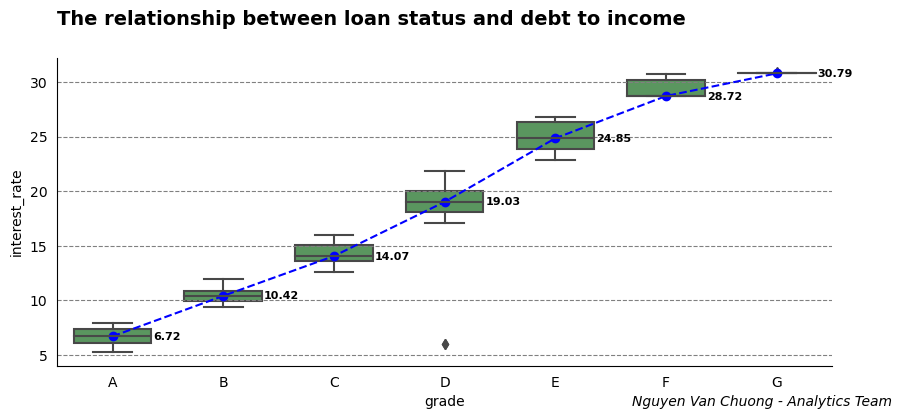

In [321]:
fig, ax = plt.subplots(figsize=(10, 4))

box_width=0.7
ax=sns.boxplot(x=dataLoan_grade.grade, y=dataLoan_grade.interest_rate, data=dataLoan_grade, width=box_width, color='#50a057')
ax.plot(range(len(mean_list_grade)), mean_list_grade, 'bo--', label= "versicolor")

# show medians
i = 0
for i in range(len(mean_list_grade)):
    x = i+box_width/2*1.05
    y = mean_list_grade[i]
    ax.annotate('%.2f' %mean_list_grade[i],
                  (x,y-0.3),
                  #color='white',
                  weight='semibold',
                  size=8
                 )

# Add x, y gridlines
ax.yaxis.grid(color='gray', linestyle='dashed')

# remove the line above and to the right of the chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# remove ticks on 2 axes
ax.tick_params(left=False, bottom=False) 

# add title, label axes and source:
plt.suptitle('The relationship between loan status and debt to income', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
#plt.title('2nd title', style='italic', size=12, loc='left')
#plt.xlabel('loan_status', size=12)
#plt.ylabel('debt_to_income', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)


plt.show()


**Comments:** 
* The ratings range from A to G and are proportional to the loan interest rate. The closer the rank goes to G, the higher the loan interest rate, which means the higher the risk level. 
* And conversely, the closer the rating is to A, the lower the lending interest rate, and the lower the risk level.